In [1]:
import pandas as pd

# Load the dataset
file_path = 'cleaned_dataset_car.csv'
data = pd.read_csv(file_path)

In [2]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
0,2014,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5,Maruti,Swift-Dzire
1,2014,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5,Skoda,Rapid
2,2006,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,127.0,5,Honda,City
3,2010,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,224.0,5,Hyundai,i20
4,2007,130000.0,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,115.0,5,Maruti,Swift


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8080 entries, 0 to 8079
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           8080 non-null   int64  
 1   selling_price  8080 non-null   float64
 2   km_driven      8080 non-null   float64
 3   fuel           8080 non-null   object 
 4   seller_type    8080 non-null   object 
 5   transmission   8080 non-null   object 
 6   owner          8080 non-null   object 
 7   mileage        8080 non-null   float64
 8   engine         8080 non-null   float64
 9   max_power      8080 non-null   float64
 10  torque         8080 non-null   float64
 11  seats          8080 non-null   int64  
 12  brand_name     8080 non-null   object 
 13  model          8080 non-null   object 
dtypes: float64(6), int64(2), object(6)
memory usage: 883.9+ KB


In [4]:
df = data.copy()

In [5]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
0,2014,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5,Maruti,Swift-Dzire
1,2014,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5,Skoda,Rapid
2,2006,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,127.0,5,Honda,City
3,2010,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,224.0,5,Hyundai,i20
4,2007,130000.0,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,115.0,5,Maruti,Swift


In [6]:
current_year = pd.Timestamp.now().year

In [7]:
df['number_of_year_used'] = df['year'].apply(lambda x : current_year - x) 

In [8]:
df.drop(columns=['year'],inplace = True)

In [9]:
df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model,number_of_year_used
0,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5,Maruti,Swift-Dzire,10
1,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5,Skoda,Rapid,10
2,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,127.0,5,Honda,City,18
3,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,224.0,5,Hyundai,i20,14
4,130000.0,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,115.0,5,Maruti,Swift,17


In [10]:
df.isnull().sum()

selling_price          0
km_driven              0
fuel                   0
seller_type            0
transmission           0
owner                  0
mileage                0
engine                 0
max_power              0
torque                 0
seats                  0
brand_name             0
model                  0
number_of_year_used    0
dtype: int64

In [11]:
categorical_variables = [i for i in df.columns.tolist() if df[i].dtype == 'O']

In [12]:
numerical_variables = [i for i in df.columns.tolist() if i not in categorical_variables]

In [13]:
numerical_variables

['selling_price',
 'km_driven',
 'mileage',
 'engine',
 'max_power',
 'torque',
 'seats',
 'number_of_year_used']

In [14]:
categorical_variables

['fuel', 'seller_type', 'transmission', 'owner', 'brand_name', 'model']

In [15]:
for i in categorical_variables:
    print(f'Then column {i} is having {df[i].nunique()} unique values')

Then column fuel is having 4 unique values
Then column seller_type is having 3 unique values
Then column transmission is having 2 unique values
Then column owner is having 4 unique values
Then column brand_name is having 21 unique values
Then column model is having 155 unique values


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [17]:
# Encode categorical variables
label_encoders = {col: LabelEncoder() for col in categorical_variables}

for col, le in label_encoders.items():
    df[col] = le.fit_transform(df[col])

In [18]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['selling_price'])
y = df['selling_price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
X_train

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model,number_of_year_used
2887,47000.0,1,1,1,0,20.30,1248.0,75.00,197.0,5,4,65,11
3078,23700.0,3,1,1,0,20.40,1197.0,81.80,113.0,5,12,123,8
434,50000.0,1,1,1,0,17.60,2179.0,153.86,400.0,7,17,68,6
3985,35000.0,1,1,1,2,27.28,1047.0,69.00,140.0,5,17,129,8
751,120000.0,1,1,1,2,10.50,2179.0,120.00,290.0,8,11,116,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,77000.0,1,0,1,0,21.10,1248.0,73.90,113.0,5,12,108,11
5390,80000.0,2,1,1,2,17.30,1061.0,57.50,78.0,5,12,139,16
860,120000.0,1,1,1,2,13.60,2523.0,63.00,180.0,7,11,21,14
7603,56494.0,3,2,1,0,18.20,1199.0,88.70,110.0,5,6,74,8


In [20]:
X_test

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model,number_of_year_used
7587,22000.0,3,1,1,0,25.17,799.0,53.30,72.0,5,15,78,8
2069,10000.0,3,1,1,0,17.30,993.0,60.00,78.0,5,12,151,23
7621,111000.0,1,1,1,2,21.19,1396.0,88.73,220.0,5,7,154,8
2063,20000.0,3,1,1,0,19.50,1199.0,88.76,110.0,5,6,10,6
7733,35000.0,3,1,1,0,24.70,796.0,47.30,69.0,5,12,9,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,90000.0,3,1,1,1,17.92,1086.0,62.10,96.1,5,7,115,15
3513,80000.0,1,1,1,0,15.40,2523.0,75.00,200.0,9,11,116,9
6732,45000.0,1,0,0,0,19.33,1999.0,177.00,430.0,5,8,145,7
438,40000.0,1,1,0,0,23.80,1498.0,78.90,160.0,5,6,10,5


In [21]:
X_train_cat = X_train[categorical_variables]
X_test_cat = X_test[categorical_variables]

In [22]:
X_train_num = X_train[['km_driven','mileage','engine', 'max_power', 'torque','seats','number_of_year_used']]
X_test_num = X_test[['km_driven','mileage','engine', 'max_power', 'torque','seats','number_of_year_used']]

In [23]:
X_train_num.shape,X_test_num.shape

((6060, 7), (2020, 7))

In [24]:
# Initialize the scaler
scaler = StandardScaler()

In [25]:
# Fit the scaler on the training data and transform the training data
X_train_num_scaled = scaler.fit_transform(X_train_num)

# Transform the test data
X_test_num_scaled = scaler.transform(X_test_num)

In [26]:
X_train_num_scaled.shape,X_test_num_scaled.shape

((6060, 7), (2020, 7))

In [27]:
X_train_num_scaled

array([[-0.47571429,  0.21381119, -0.42089165, ...,  0.23725784,
        -0.43400713,  0.19647246],
       [-0.96403013,  0.23946878, -0.52289578, ..., -0.71257677,
        -0.43400713, -0.55062424],
       [-0.41284101, -0.47894392,  1.44118383, ...,  2.53269149,
         1.65087849, -1.0486887 ],
       ...,
       [ 1.05420229, -1.50524777,  2.12921171, ...,  0.04502941,
         1.65087849,  0.94356916],
       [-0.27674131, -0.32499834, -0.51889562, ..., -0.74649944,
        -0.43400713, -0.55062424],
       [ 1.95538603, -0.42762872, -0.11887941, ..., -0.14719903,
        -0.43400713,  1.44163362]])

In [28]:
num_cols = ['km_driven','mileage','engine', 'max_power', 'torque','seats','number_of_year_used']

In [29]:
# Combine the scaled numerical data and categorical data back together
X_train_scaled = pd.DataFrame(X_train_num_scaled, columns=num_cols).join(X_train_cat.reset_index(drop=True))
X_test_scaled = pd.DataFrame(X_test_num_scaled, columns=num_cols).join(X_test_cat.reset_index(drop=True))

In [30]:
X_train_scaled

,km_driven,mileage,engine,max_power,torque,seats,number_of_year_used,fuel,seller_type,transmission,owner,brand_name,model
0,-0.475714,0.213811,-0.420892,-0.462723,0.237258,-0.434007,0.196472,1,1,1,0,4,65
1,-0.964030,0.239469,-0.522896,-0.267951,-0.712577,-0.434007,-0.550624,3,1,1,0,12,123
2,-0.412841,-0.478944,1.441184,1.796063,2.532691,1.650878,-1.048689,1,1,1,0,17,68
3,-0.727207,2.004711,-0.822908,-0.634581,-0.407273,-0.434007,-0.550624,1,1,1,2,17,129
4,1.054202,-2.300633,1.441184,0.826212,1.288860,2.693321,1.939698,1,1,1,2,11,116
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6055,0.153019,0.419072,-0.420892,-0.494230,-0.712577,-0.434007,0.196472,1,0,1,0,12,108
6056,0.215892,-0.555917,-0.794907,-0.963975,-1.108341,-0.434007,1.441634,2,1,1,2,12,139
6057,1.054202,-1.505248,2.129212,-0.806439,0.045029,1.650878,0.943569,1,1,1,2,11,21
6058,-0.276741,-0.324998,-0.518896,-0.070314,-0.746499,-0.434007,-0.550624,3,2,1,0,6,74


In [31]:
X_test_scaled

,km_driven,mileage,engine,max_power,torque,seats,number_of_year_used,fuel,seller_type,transmission,owner,brand_name,model
0,-0.999658,1.463336,-1.318928,-1.084276,-1.176187,-0.434007,-0.550624,3,1,1,0,15,78
1,-1.251151,-0.555917,-0.930912,-0.892368,-1.108341,-0.434007,3.184859,3,1,1,0,12,151
2,0.865582,0.442164,-0.124880,-0.069455,0.497332,-0.434007,-0.550624,1,1,1,2,7,154
3,-1.041574,0.008550,-0.518896,-0.068595,-0.746499,-0.434007,-1.048689,3,1,1,0,6,10
4,-0.727207,1.342745,-1.324928,-1.256134,-1.210109,-0.434007,-0.799656,3,1,1,0,12,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,0.425469,-0.396840,-0.744905,-0.832218,-0.903674,-0.434007,1.192601,3,1,1,1,7,115
2016,0.215892,-1.043411,2.129212,-0.462723,0.271181,3.735764,-0.301592,1,1,1,0,11,116
2017,-0.517630,-0.035067,1.081169,2.458862,2.871918,-0.434007,-0.799656,1,0,0,0,8,145
2018,-0.622419,1.111827,0.079129,-0.351015,-0.181122,-0.434007,-1.297721,1,1,0,0,6,10


In [32]:
y_train.head()

2887     250000.0
3078     470000.0
434     1525000.0
3985     400000.0
751      220000.0
Name: selling_price, dtype: float64

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error, r2_score

# Train a decision tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(random_state=42)

In [34]:
# Make predictions on the train set
y_pred_train = model.predict(X_train_scaled)

In [35]:
# Evaluate the model on trainning dataset
mse = root_mean_squared_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

mse, r2 

(13321.376117569756, 0.9997155172650293)

In [36]:
residuals_train = y_train - y_pred_train

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

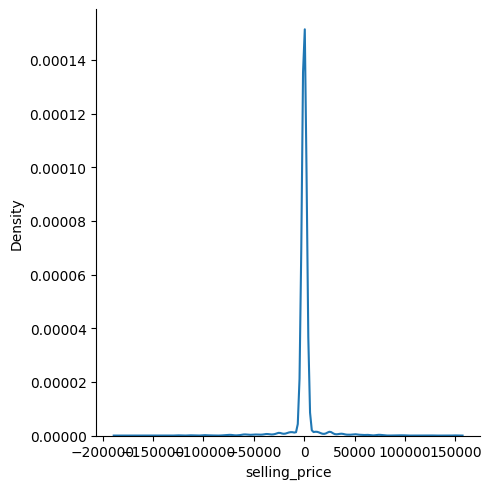

In [38]:
sns.displot(residuals_train,kind='kde')
plt.show()

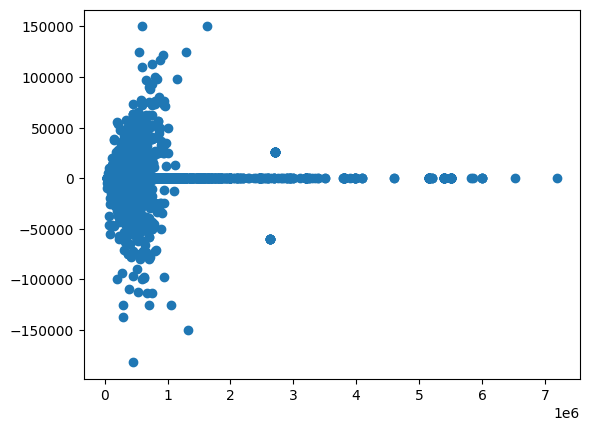

In [39]:
plt.scatter(y_train,residuals_train)
plt.show()

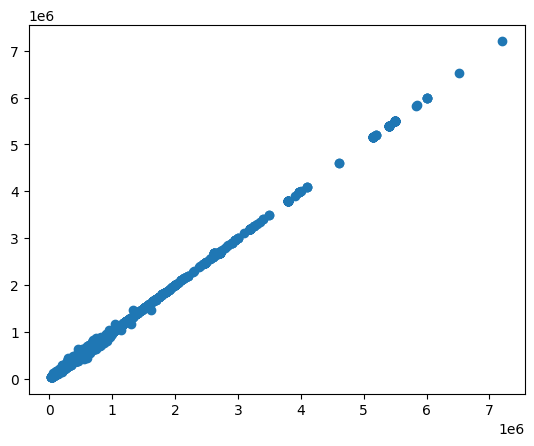

In [40]:
plt.scatter(y_train,y_pred_train)

In [41]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

rmse, r2

(157227.8344984136, 0.962936226028225)

In [42]:
residuals = y_test - y_pred

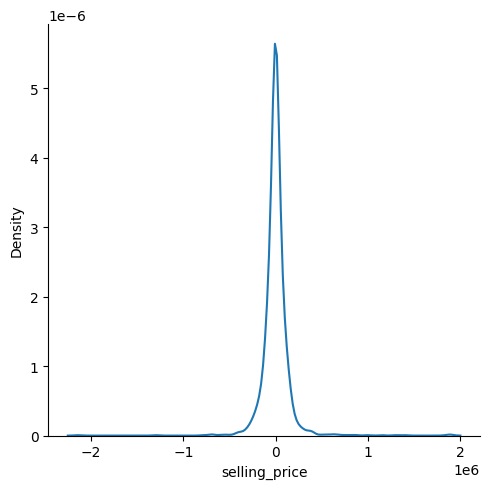

In [43]:
sns.displot(residuals,kind='kde')
plt.show()

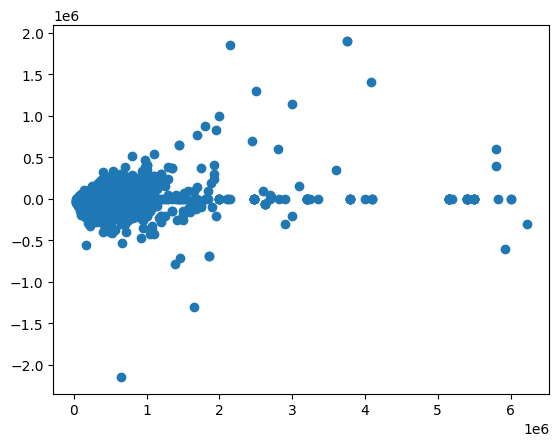

In [44]:
plt.scatter(y_test,residuals)
plt.show()

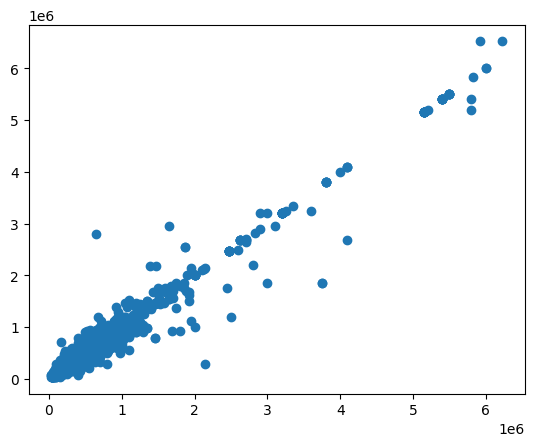

In [45]:
plt.scatter(y_test,y_pred)

In [46]:
param_grid = {
    'max_depth': [None,10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}


In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           scoring='r2')

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='r2')

In [48]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_params, best_score)


{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5} 0.9560673107046693


In [49]:
# Retrieve the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Cross-Validation Score: 0.9560673107046693


In [50]:
# Initialize the final model with the best parameters
final_model = DecisionTreeRegressor(random_state=42, **best_params)

In [51]:
# Train the final model on the entire training dataset
final_model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                      random_state=42)

In [52]:
# Make predictions on the train set using the final model
y_pred_train_final = final_model.predict(X_train_scaled)

In [53]:
# Evaluate the model on trainning dataset
mse = root_mean_squared_error(y_train, y_pred_train_final)
r2 = r2_score(y_train, y_pred_train_final)

mse, r2 

(97068.70889626311, 0.9848951561494045)

In [54]:
# Make predictions on the test set using the final model
y_pred_final = final_model.predict(X_test_scaled)

In [55]:
# Evaluate the model on trainning dataset
mse = root_mean_squared_error(y_test, y_pred_final)
r2 = r2_score(y_test, y_pred_final)

mse, r2 

(162930.68826680843, 0.9601987641751409)

In [56]:
# Making Predictions

In [57]:
data.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model
0,2014,450000.0,145500.0,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5,Maruti,Swift-Dzire
1,2014,370000.0,120000.0,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5,Skoda,Rapid
2,2006,158000.0,140000.0,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,127.0,5,Honda,City
3,2010,225000.0,127000.0,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,224.0,5,Hyundai,i20
4,2007,130000.0,120000.0,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,115.0,5,Maruti,Swift


In [58]:
# result
data.iloc[100,1]

625000.0

In [59]:
data.iloc[100,:]

year                     2014
selling_price        625000.0
km_driven             70000.0
fuel                   Diesel
seller_type        Individual
transmission        Automatic
owner            Second Owner
mileage                 11.79
engine                 2179.0
max_power               120.0
torque                  290.0
seats                       8
brand_name           Mahindra
model                 Scorpio
Name: 100, dtype: object

In [60]:
# Making predictions on new data using the final model
new_data = pd.DataFrame(data.iloc[100,:]).transpose()

In [61]:
current_year = pd.Timestamp.now().year
current_year

2024

In [62]:
new_data['number_of_year_used'] = current_year - new_data['year']

In [63]:
# result
Actual_price  = new_data['selling_price'].values[0]
Actual_price

625000.0

In [64]:
new_data.drop(columns = ['year','selling_price'],inplace=True)

In [65]:
# Encode categorical variables using the same encoders as during training
for col, le in label_encoders.items():
    new_data[col] = le.transform(new_data[col])

In [66]:
new_data

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model,number_of_year_used
100,70000.0,1,1,0,2,11.79,2179.0,120.0,290.0,8,11,116,10


In [67]:
new_data_num = new_data[['km_driven','mileage','engine','max_power','torque','seats','number_of_year_used']]

In [68]:
new_data_num

,km_driven,mileage,engine,max_power,torque,seats,number_of_year_used
100,70000.0,11.79,2179.0,120.0,290.0,8,10


In [69]:
new_data_cat = new_data[['fuel','seller_type','transmission','owner','brand_name','model']]

In [70]:
new_data_cat

,fuel,seller_type,transmission,owner,brand_name,model
100,1,1,0,2,11,116


In [71]:
new_data

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model,number_of_year_used
100,70000.0,1,1,0,2,11.79,2179.0,120.0,290.0,8,11,116,10


In [72]:
# Scale only the numerical features using the scaler fitted on the training data
new_data_num_scaled = scaler.transform(new_data_num)

In [73]:
new_data_num_scaled

array([[ 0.00631422, -1.96965027,  1.44118383,  0.82621152,  1.28886045,
         2.69332131, -0.05255977]])

In [74]:
# Combine the scaled numerical data and categorical data back together
new_data_scaled = pd.DataFrame(new_data_num_scaled, columns=['km_driven','mileage','engine','max_power','torque','seats','number_of_year_used']).join(new_data_cat.reset_index(drop=True))

In [75]:
new_data_scaled

,km_driven,mileage,engine,max_power,torque,seats,number_of_year_used,fuel,seller_type,transmission,owner,brand_name,model
0,0.006314,-1.96965,1.441184,0.826212,1.28886,2.693321,-0.05256,1,1,0,2,11,116


In [76]:
# Make predictions using the final model
predictions_final = final_model.predict(new_data_scaled)

print("Predicted value:", predictions_final[0])


Predicted value: 640214.2857142857


In [77]:
Actual_price

625000.0

## Random Forest

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [79]:
# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [80]:
# Train the model
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [81]:
# Make predictions
y_pred_train = rf.predict(X_train_scaled)

In [82]:
# Make predictions
y_pred = rf.predict(X_test_scaled)

In [83]:
# Evaluate the model
rmse_train = root_mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

In [84]:
rmse_train,r2_train

(52158.586413993886, 0.9956387663002224)

In [85]:
residuals_train = y_train - y_pred_train

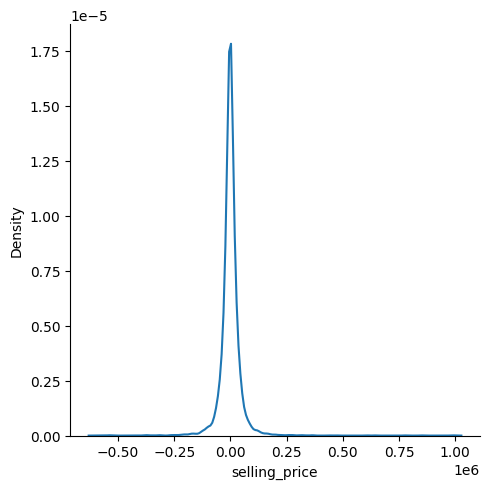

In [86]:
sns.displot(residuals_train,kind='kde')
plt.show()

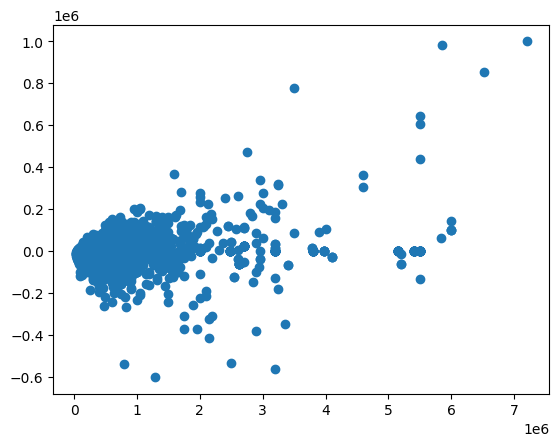

In [87]:
plt.scatter(y_train,residuals_train)
plt.show()

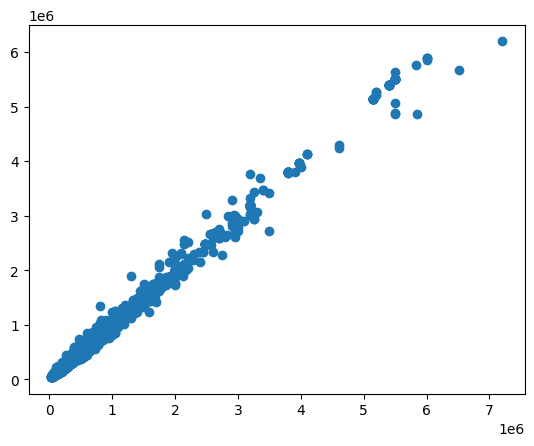

In [88]:
plt.scatter(y_train,y_pred_train)

In [89]:
# Evaluate the model
rmse_test = root_mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

In [90]:
rmse_test,r2_test

(130975.80217616128, 0.9742798849506815)

In [91]:
residuals = y_test - y_pred

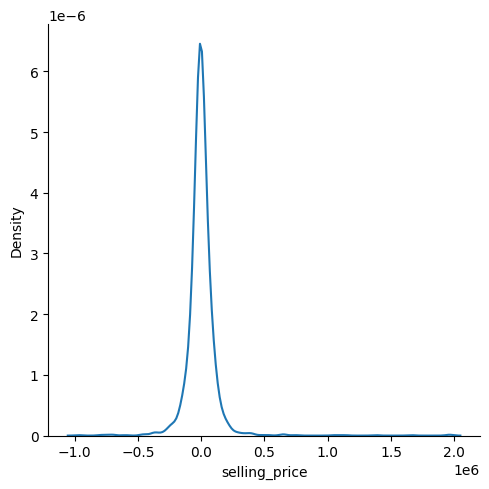

In [92]:
sns.displot(residuals,kind='kde')
plt.show()

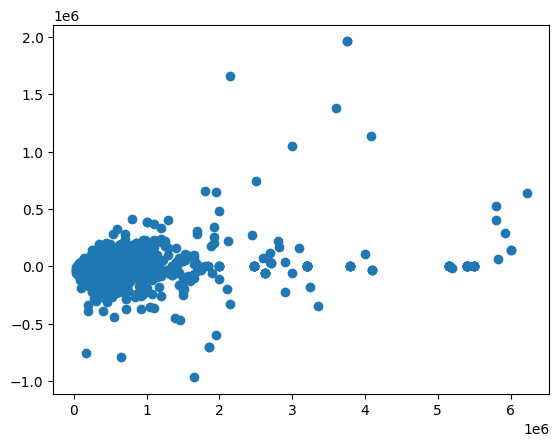

In [93]:
plt.scatter(y_test,residuals)
plt.show()

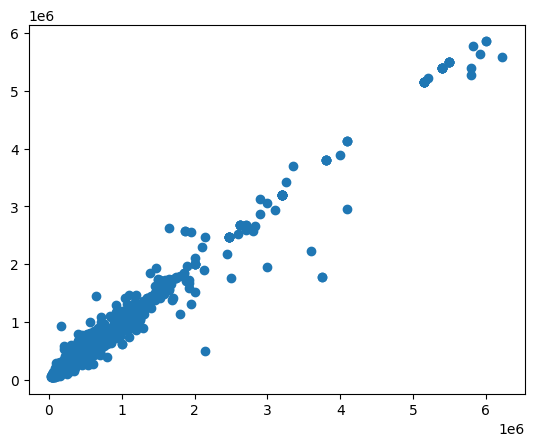

In [94]:
plt.scatter(y_test,y_pred)

In [95]:
# Making Prediction 

In [96]:
# Making predictions on new data using the final model
new_data = pd.DataFrame(data.iloc[100,:]).transpose()

In [97]:
current_year = pd.Timestamp.now().year
current_year

2024

In [98]:
new_data['number_of_year_used'] = current_year - new_data['year']

In [99]:
# result
Actual_price  = new_data['selling_price'].values[0]
Actual_price

625000.0

In [100]:
new_data.drop(columns = ['year','selling_price'],inplace=True)

In [101]:
# Encode categorical variables using the same encoders as during training
for col, le in label_encoders.items():
    new_data[col] = le.transform(new_data[col])

In [102]:
new_data

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model,number_of_year_used
100,70000.0,1,1,0,2,11.79,2179.0,120.0,290.0,8,11,116,10


In [103]:
new_data_num = new_data[['km_driven','mileage','engine','max_power','torque','seats','number_of_year_used']]

In [104]:
new_data_num 

,km_driven,mileage,engine,max_power,torque,seats,number_of_year_used
100,70000.0,11.79,2179.0,120.0,290.0,8,10


In [105]:
new_data_cat = new_data[['fuel','seller_type','transmission','owner','brand_name','model']]

In [106]:
new_data_cat

,fuel,seller_type,transmission,owner,brand_name,model
100,1,1,0,2,11,116


In [107]:
new_data

,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,brand_name,model,number_of_year_used
100,70000.0,1,1,0,2,11.79,2179.0,120.0,290.0,8,11,116,10


In [108]:
# Scale only the numerical features using the scaler fitted on the training data
new_data_num_scaled = scaler.transform(new_data_num)

In [109]:
new_data_num_scaled

array([[ 0.00631422, -1.96965027,  1.44118383,  0.82621152,  1.28886045,
         2.69332131, -0.05255977]])

In [110]:
# Combine the scaled numerical data and categorical data back together
new_data_scaled = pd.DataFrame(new_data_num_scaled, columns=['km_driven','mileage','engine','max_power','torque','seats','number_of_year_used']).join(new_data_cat.reset_index(drop=True))

In [111]:
new_data_scaled

,km_driven,mileage,engine,max_power,torque,seats,number_of_year_used,fuel,seller_type,transmission,owner,brand_name,model
0,0.006314,-1.96965,1.441184,0.826212,1.28886,2.693321,-0.05256,1,1,0,2,11,116


In [112]:
# Make predictions using the final model
predictions_final = final_model.predict(new_data_scaled)

print("Predicted value:", predictions_final[0])


Predicted value: 640214.2857142857


In [113]:
Actual_price

625000.0